In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf

### データの読み込み

In [2]:
dat = pd.read_csv("data/data3a.csv", delimiter=",")
print(dat.head())

   count   size
0      6   8.31
1      6   9.44
2      6   9.50
3     12   9.07
4     10  10.16


### ポアソン回帰の実行 Execution of Poisson regression

In [6]:
# モデルの設定 Construct a generalized linear model
model = smf.glm(formula = "count ~ size", data = dat, family=sm.families.Poisson())
# 回帰分析の実行 Execution of Poisson regression 
results = model.fit()
# 結果を表示　Print results
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -116.27
Date:                Mon, 21 Jan 2019   Deviance:                       40.298
Time:                        12:39:22   Pearson chi2:                     38.1
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7459      0.515      1.447      0.148      -0.264       1.756
size           0.1323      0.052      2.562      0.0

### 回帰曲線の図示 Plotting of regression curve

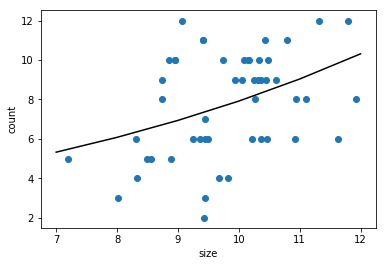

In [4]:
x_plot = np.arange(7, 13)
pred = results.predict(pd.DataFrame({"size": x_plot}))

# 散布図をプロット　scatter plot
plt.scatter(dat["size"],dat["count"])

# 回帰曲線をプロット regression curve
plt.plot(x_plot, pred, color="black")
plt.xlabel("size")
plt.ylabel("count")
plt.show()

In [5]:
# countの予測 Prediction of the value of count
print(results.predict(pd.DataFrame({"size": [10]})))
# 回帰式から予測値を求める場合 Prediction of the value of count from a regression equation
print(np.exp(results.params["size"]*10+results.params["Intercept"]))

0    7.912763
dtype: float64
7.91276271653
